In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Coint-Toss example
- State cost ($q$): q(Tails)=0 and q(Heads)=1
- Passive dynamics: Unbiased coin q(Heads)=0.5
- Action corresponds to biasing the coin
- $\mathbb{E}_u(cost) = \mathbb{E}_u(q) + KL(u||q)$
- $u^*(Heads)=0.27$. u(Heads)=0 is not optimal because involves too large cost

/home/desteban/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/desteban/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


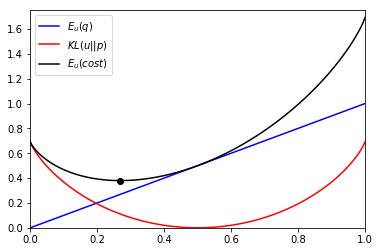

opt_action: 0.26926926926926925
opt_cost: 0.3798857663126666


In [82]:
def KLcoin(p,q):
    """Defines KL(p||q)"""
    return np.sum(np.where(p != 0, p * np.log(p / q), 0), axis=0)

state_costs = np.array([1, 0])  # [cost_head, cost_tail]

actions = np.linspace(0, 1, 1000)  # Biased coin
h_actions = actions  # Heads prob
t_actions = 1-actions  # Tails prob

passive_dyn = 0.5*np.ones_like(actions)  # Unbiased coin
h_passive = passive_dyn
t_passive = 1 - passive_dyn

event_actions = np.vstack((h_actions, t_actions))
event_passive = np.vstack((h_passive, t_passive))

state_cost = event_actions.T.dot(state_costs)
kl_cost = KLcoin(event_actions, event_passive)
sum_cost = state_cost + kl_cost

opt_idx = np.argmin(sum_cost)
opt_action = actions[opt_idx]
opt_cost = sum_cost[opt_idx]

fig, ax = plt.subplots(1,1)

ax.plot(actions, state_cost, color='blue', label='$E_u(q)$')
ax.plot(actions, kl_cost, color='red', label='$KL(u||p)$')
ax.plot(actions, sum_cost, color='black', label='$E_u(cost)$')
ax.scatter(opt_action, opt_cost, color='black')

ax.set_xlim([0, 1])
ax.set_ylim([0, 1.75])
ax.legend()

plt.show()
print('opt_action:', opt_action)
print('opt_cost:', opt_cost)

In [89]:
# Stochastic shortest path
passive = 0.5  # Random walk between 2 children nodes
cost = 1
# Green node action_cost
print('Green cost_paper', 0.0)
kl = 0.5*math.log(0.5/0.5) + 0.5*math.log(0.5/0.5)
print('Green cost_calculated', kl)
print('--')
# Red node action_cost
print('Red cost_paper', 0.6)
kl = 0.0*0 + 1.0*math.log(1.0/0.5)
print('Red cost_calculated', kl)


Green cost_paper 0.0
Green cost_calculated 0.0
--
Red cost_paper 0.6
Red cost_calculated 0.6931471805599453
